In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

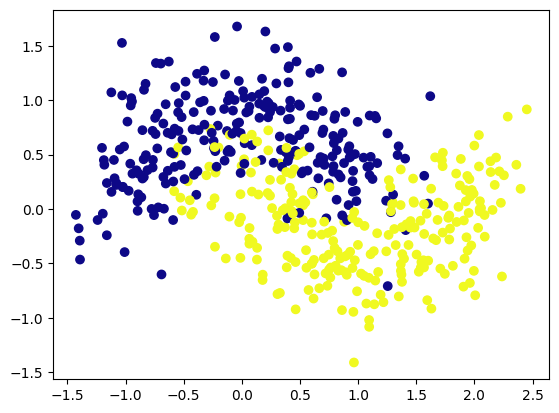

In [ ]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='plasma')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Voting Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

voting_model = VotingClassifier([('SGD', model_1),
                                 ('Tree', model_2),
                                 ('KNN', model_3)], voting='hard')

In [ ]:
for model in (model_1, model_2, model_3, voting_model):
  model.fit(X_train, y_train)
  print(model.__class__.__name__, model.score(X_train, y_train))

SGDClassifier 0.82
DecisionTreeClassifier 1.0
KNeighborsClassifier 0.9342857142857143
VotingClassifier 0.9685714285714285


# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                          n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8933333333333333

We notice that the Bagging methon performes better than a simple technique of Vote

In [ ]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8733333333333333

We can improve the performance of this model by finding the best hyperparameters

# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
model = AdaBoostClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

In [ ]:
model = GradientBoostingClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8933333333333333

# Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
model = StackingClassifier([('SGD', model_1),
                                 ('Tree', model_2),
                                 ('KNN', model_3)], final_estimator=KNeighborsClassifier())


model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8666666666666667

En conclusion :

  * **Bagging** : (plusieurs instance d'un meme modèle entrainés sur différentes portions du dataset : Bootstrapping), On entraine les modèles en parallèle. On l'utilise lorsque nos modèles présentent de l'Overfitting.
  * **Boosting** : On entraine les modèles en série en demandant a chaque fois du modèle de corriger les erreurs de son prédécesseur. On l'utilise lorsque nos modèles présentent de l'Underfitting.
  * **Stacking** :  On prédit le résultat final en fonction des prédiction trouvées